In [84]:
import pandas
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import numpy as np
from statsmodels.datasets.longley import load_pandas
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy import stats
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
from scipy.stats import anderson
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.stats.diagnostic import normal_ad 
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import durbin_watson
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.tools.tools import add_constant
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [74]:
df = pandas.read_csv('E:/project/house_price_data.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [75]:
df = df.drop(columns=['No'])
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [76]:
y_name = 'Y house price of unit area'
y = df[y_name].values

x_names = [x for x in df.columns if x != y_name]
x = df[x_names].values

In [77]:
res2 = sm.OLS(y, x).fit()
print(res2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1351.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):                   1.34e-265
Time:                        23:42:30   Log-Likelihood:                         -1489.3
No. Observations:                 414   AIC:                                      2991.
Df Residuals:                     408   BIC:                                      3015.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [78]:
model = sm.OLS(y, x, hasconst=True)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     111.6
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           4.11e-74
Time:                        23:42:32   Log-Likelihood:                -1489.3
No. Observations:                 414   AIC:                             2991.
Df Residuals:                     408   BIC:                             3015.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.7401      1.416      2.641      0.009       0.956       6.524
x2            -0.2708      0.039     -6.999      0.000      -0.347      -0.195
x3            -0.0055      0.001    -10.121      0.000      -0.007      -0.004
x4             1.1290      0.189      5.975      0.000       0.758       1.501
x5           203.3142     43.524      4.671      0.000     117.755     288.873
x6          -103.3604     23.311     -4.434      0.000    -149.185     -57.535
==============================================================================
Omnibus:                      223.806   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3262.680
Skew:                           1.954   Prob(JB):                         0.00
Kurtosis:                      16.186   Cond. No.                     2.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
resid = results.resid
print(resid)

[-9.62554444e+00 -5.90213093e+00 -4.54891004e-02  7.76493522e+00
 -3.13611272e+00 -6.57218583e-01  1.08014144e+00  4.97267782e-01
  9.75261043e+00 -1.33168461e+01  7.18875121e+00  5.27272342e+00
 -2.15915207e+00 -4.68017300e+00 -1.01724323e+01  1.39668128e+01
  1.98976592e+01 -1.15332107e+00 -3.78173865e+00 -9.17849116e-01
 -6.53702074e+00  2.93653426e+00 -3.30636831e+00  3.77387584e-01
  3.74883222e+00 -5.97480631e+00  9.88335157e+00 -8.93783825e+00
  4.75100238e+00  1.20554392e+01  8.87234730e+00 -1.60048370e+01
  2.61337168e+00  3.35431044e+00  7.73305119e+00 -2.77837552e+00
 -8.87766791e+00 -4.27256885e+00  3.46021902e+00  7.57147373e-01
  9.91526668e-01  1.87430750e+00 -1.77517998e+00 -5.91236459e+00
  7.68799878e+00 -1.02884668e+00 -3.94640800e+00  2.46720862e+01
  7.74648401e-01  2.60755536e+00  2.77673045e+00 -1.09127028e+00
 -8.21152744e+00 -3.09875765e+00  6.54423073e+00 -1.06703650e+01
 -1.07197930e+00  6.35650994e+00  9.13582114e+00  7.36567984e-01
 -1.33144489e+01  1.36979

In [33]:
#Linearity test
from scipy import stats
skip = len(results.params)  # bug in linear_harvey_collier
rr = sms.recursive_olsresiduals(results, skip=skip, alpha=0.95, order_by=None)
test_lin0 = stats.ttest_1samp(rr[3][skip:], 0) 
print("{0}: \t{1:.4f} | {2}".format('correctly specified as linear', test_lin0[1], 0.05))

correctly specified as linear: 	0.3714 | 0.05


In [34]:
#Heteroskedasticity
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test_het1 = sms.het_breuschpagan(results.resid, results.model.exog)
print("{0}: \t{1:.4f} | {2}".format('homoskedasticity is present', test_het1[1], 0.05))

homoskedasticity is present: 	0.0000 | 0.05


In [35]:
#Heteroskedasticity
white_test = het_white(results.resid, results.model.exog)
print("{0}: \t{1:.4f} | {2}".format('homoskedasticity is present', white_test[1], 0.05))

AssertionError: 

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     111.6
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           4.11e-74
Time:                        23:40:32   Log-Likelihood:                -1489.3
No. Observations:                 414   AIC:                             2991.
Df Residuals:                     408   BIC:                             3015.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.7401      1.416      2.641      0.009       0.956       6.524
x2            -0.2708      0.039     -6.999      0.000      -0.347      -0.195
x3            -0.0055      0.001    -10.121      0.000      -0.007      -0.004
x4             1.1290      0.189      5.975      0.000       0.758       1.501
x5           203.3142     43.524      4.671      0.000     117.755     288.873
x6          -103.3604     23.311     -4.434      0.000    -149.185     -57.535
==============================================================================
Omnibus:                      223.806   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3262.680
Skew:                           1.954   Prob(JB):                         0.00
Kurtosis:                      16.186   Cond. No.                     2.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#Autocorrelation test
test_aut = durbin_watson(results.resid)
print("{0}:  {2}|{1:.4f}|{3}".format('If 0 - positive corr, 4 - negative corr ', test_aut, 0, 4))

If 0 - positive corr, 4 - negative corr :  0|2.1404|4


In [119]:
#Interquartile range
def iqr(arr, l, p_low=25, p_upp=75):
    q3, q1 = np.percentile(arr, [p_upp,p_low])
    if l is None:
        return q3, q1
    else:
        iqr_value = q3 - q1
        upper_out = iqr_value * l + q3
        lower_out = q1 - (iqr_value * l)
        return upper_out, lower_out

In [127]:
upper_out, lower_out = iqr(results.resid, l=None, p_low=1, p_upp=99)
print('Upper outlier:', upper_out)
print('Lower Outlier:', lower_out)

Upper outlier: 27.576450734489377
Lower Outlier: -16.473049452919618


In [128]:
upper_out_y, lower_out_y = iqr(y, l=None, p_low=1, p_upp=99)
print('Upper outlier:', upper_out_y)
print('Lower Outlier:', lower_out_y)

Upper outlier: 70.88300000000001
Lower Outlier: 12.8


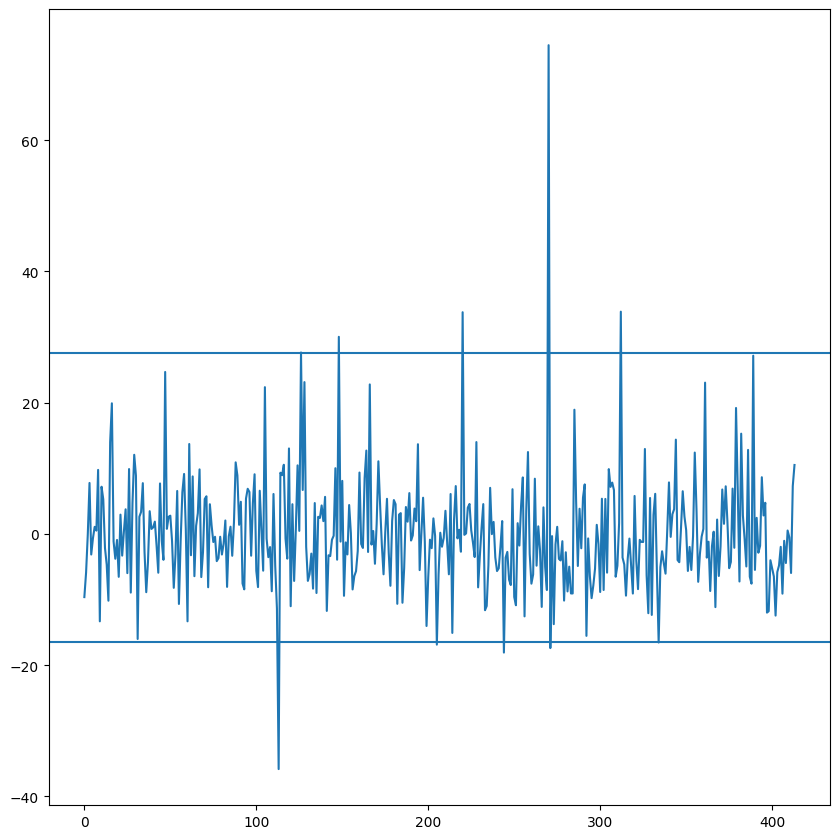

In [129]:
from matplotlib import pyplot
pyplot.plot(range(results.resid.shape[0]), results.resid)
plt.axhline(y=upper_out)
plt.axhline(y=lower_out)

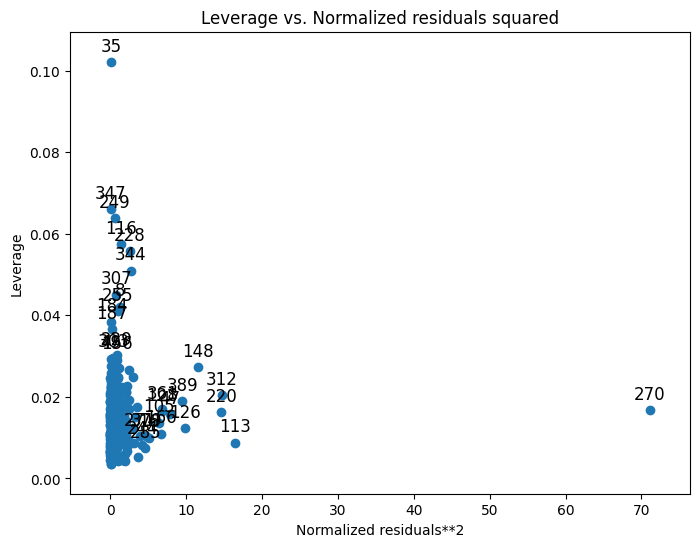

In [39]:
#Influence/ outlier test
test_class = OLSInfluence(results)
test_class.dfbetas[:5, :]
fig, ax = pyplot.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(results, ax=ax)

In [40]:
y = load_pandas().endog
X = load_pandas().exog
X = sm.add_constant(X)

In [41]:
#Normality test
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test_norm1 = sms.jarque_bera(results.resid)
print("{0}: \t{1:.4f} | {2}".format('normally distributed', test_norm1[1], 0.05))

normally distributed: 	0.0000 | 0.05


In [42]:
#Normality test
#H0: normally distributed
name = ["Chi^2", "Two-tail probability"]
test_norm2 = sms.omni_normtest(results.resid)
print("{0}: \t{1:.4f} | {2}".format('normally distributed', test_norm2[1], 0.05))

normally distributed: 	0.0000 | 0.05


In [43]:
#Shapiro-Wilk test for normality
test_norm3 = shapiro(results.resid)
print("{0}: \t{1:.4f} | {2}".format('normally distributed', test_norm3[1], 0.05))

normally distributed: 	0.0000 | 0.05


In [44]:
#Anderson-Darling test for normality
#PROBLEM!
test_norm4 = normal_ad(results.resid)
print("{0}: \t{1:.4f} | {2}".format('normally distributed', test_norm4[1], 0.05))

normally distributed: 	0.0000 | 0.05


E:\env\lib\site-packages\statsmodels\stats\_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


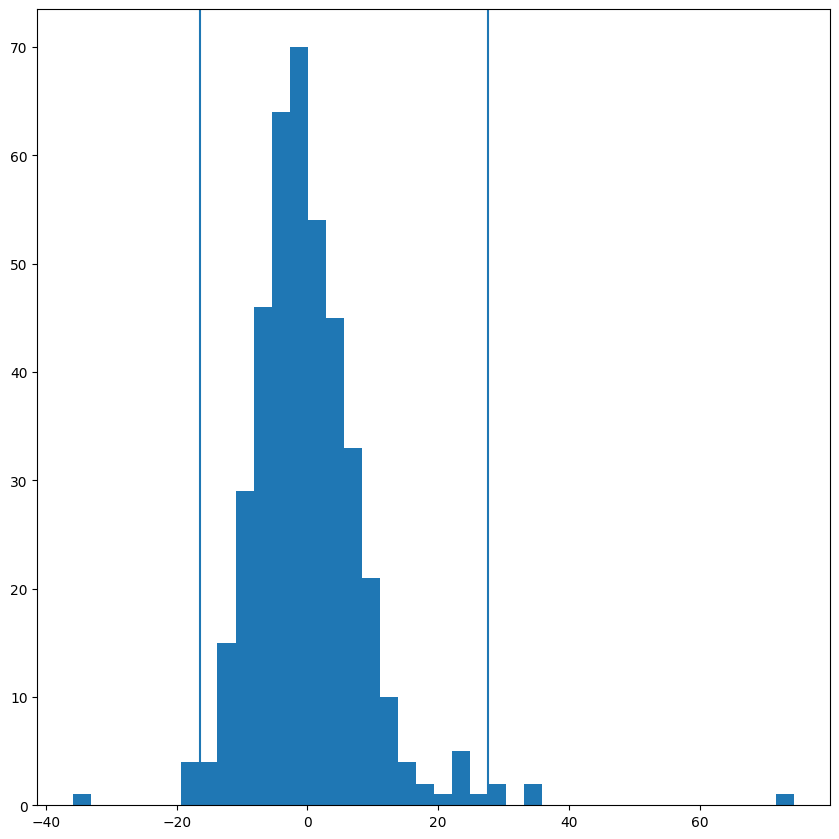

In [130]:
resid = [results.resid]
plt.hist(resid, bins=40)
plt.axvline(x=upper_out)
plt.axvline(x=lower_out)
plt.show()

In [46]:
from scipy.stats import ttest_1samp
mean_test = ttest_1samp(results.resid, 0)
print("{0}: \t{1:.4f} | {2}".format('H0: zero mean', mean_test[1], 0.05))

H0: zero mean: 	0.9999 | 0.05


In [58]:
x.shape, results.resid.shape

((414, 6), (414,))

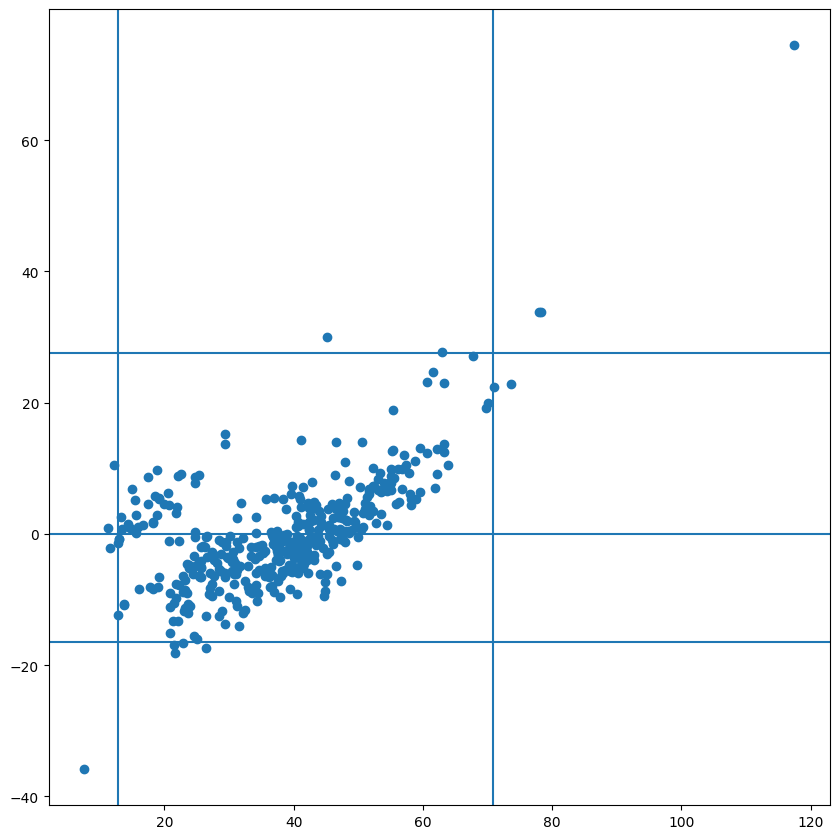

In [131]:
plt.axhline(y=upper_out)
plt.axhline(y=lower_out)
plt.axvline(x=upper_out_y)
plt.axvline(x=lower_out_y)
plt.axhline(y=0)
plt.scatter(y, results.resid)
plt.show()

In [63]:
#Multicollinearity: condition number of x
#If the condition number is less than 100, there is no serious problem
#with multicollinearity.
# Condition numbers between 100 and 1000 imply moderate to strong
#multicollinearity.
# Condition numbers bigger than 1000 indicate severe multicollinearity.

#PROBLEM!
test_multcorr = np.linalg.cond(results.model.exog)
print("{0}: \t{1:.4f} | {2}".format('Multicollinearity', test_multcorr, 0.05))

Multicollinearity: 	239060.3689 | 0.05


In [64]:
vif = pd.DataFrame()
vif["Variable"] = ['x{0}'.format(j+1) for j in range(x.shape[1])]
vif["VIF"] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]
print(vif)

  Variable           VIF
0       x1  4.253389e+07
1       x2  3.471392e+00
2       x3  4.261358e+00
3       x4  4.748152e+00
4       x5  6.178301e+06
5       x6  4.198817e+07


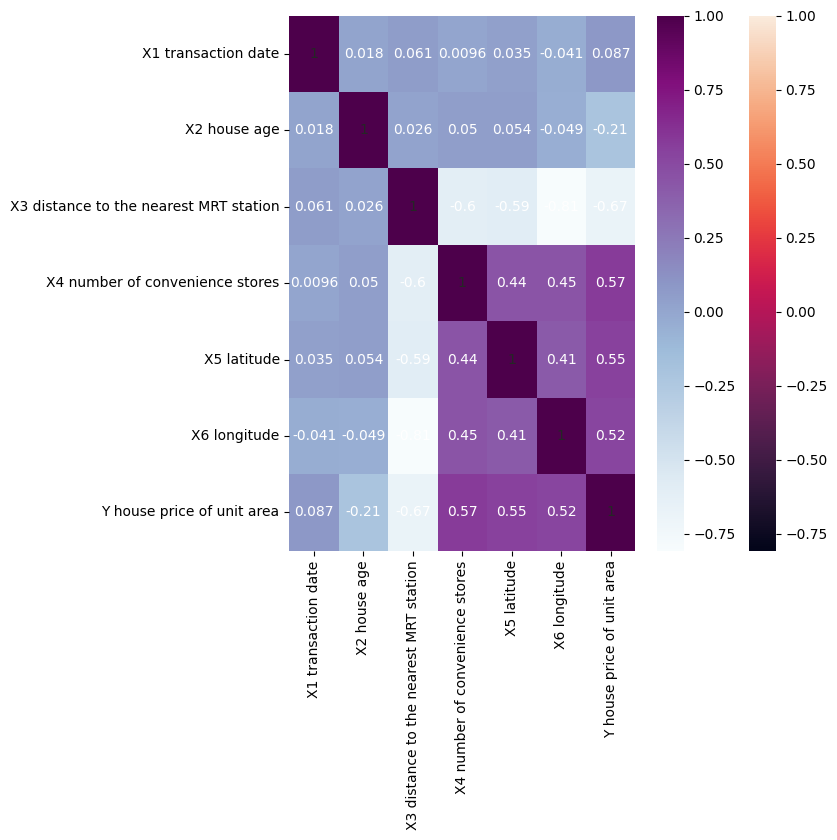

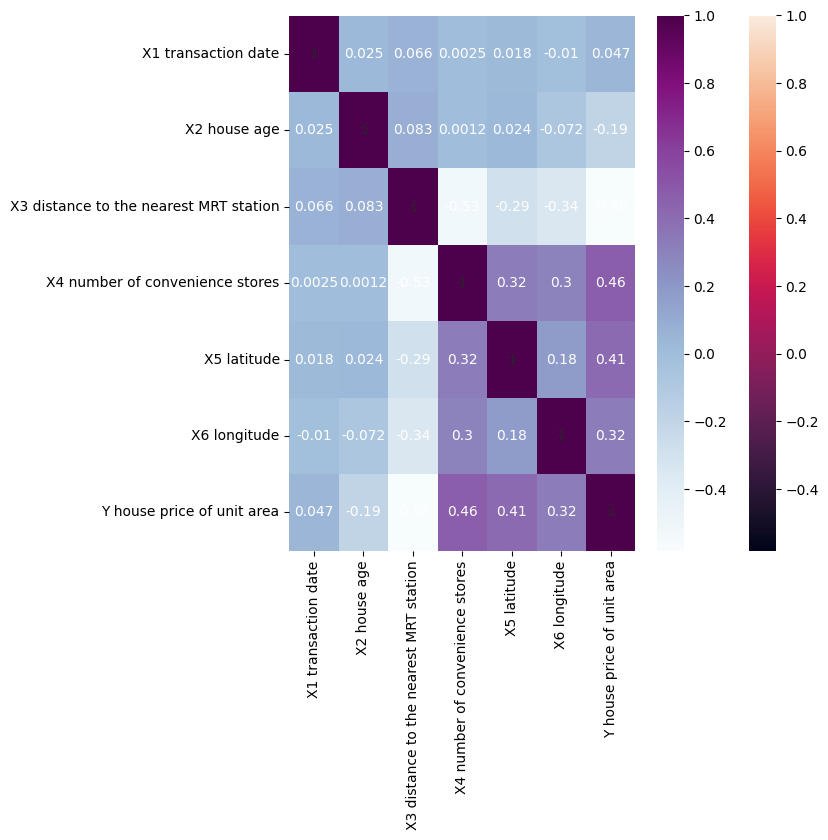

In [65]:
#Correlation matrix
corr_pearson = df.corr(method='pearson')
corr_kendall = df.corr(method='kendall')
sns.heatmap(corr_pearson, annot=True)
plt.rcParams["figure.figsize"] = [8.5, 8.5]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(corr_pearson, cmap="BuPu")
plt.show()
plt.rcParams["figure.figsize"] = [8.5, 8.5]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(corr_kendall, annot=True)
sns.heatmap(corr_kendall, cmap="BuPu")
plt.show()

In [66]:
#Оценка качества

In [67]:
#F test
results = sm.OLS(results.model.endog, results.model.exog).fit()
A = np.identity(len(results.params))
A = A[1:,:]
results.f_test(A).pvalue

4.167704697029765e-74

In [132]:
#T test
r = np.identity(results.params.shape[0])
t_test = results.t_test(r).pvalue
print(t_test)

[8.59537313e-03 1.06639347e-11 1.24828891e-21 5.02570036e-09
 4.06958864e-06 1.19108616e-05]


In [80]:
#R Squared
y_hat = results.predict(x)
r2_value = r2_score(y_true=y, y_pred=y_hat)
print(r2_value)

0.577711881698065


In [81]:
#RMSE
y_hat = results.predict(x)
rmse_value = sqrt(mean_squared_error(y_true=y, y_pred=y_hat))
print(rmse_value)

8.83131386034254


In [85]:
#Mean Absolute Error
y_hat = results.predict(x)
mean_absolute_error(y_true=y, y_pred=y_hat)

6.119594442371099

In [87]:
#MAPE
y_hat = results.predict(x)
mape = np.mean(np.abs((y - y_hat) / y))
print(mape)

0.18661917661674535


In [88]:
#SMAPE
y_hat = results.predict(x)
y_pred = y_hat
y_true = y
smape = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
print(smape)

17.528527610046687
